In [1]:
# 한글화
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 생산량
production = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/김용현/완료data/생산량/전국 해면어업 품종별 생산량.csv')

# 평균가
price = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/수산물_위판정보_전처리완료.csv')

# 광어 생산량_평균가 상관관계

In [4]:
# `수산물_위판정보_전처리완료`에서 광어만 뽑아옴 
ff_price = price[price['수산물표준코드명'] == '광어']
ff_price.reset_index(drop=True, inplace=True)

for row in range(len(ff_price)):
  ff_price.loc[row, '위판일자'] = ff_price.loc[row, '위판일자'].replace('-0','-').replace("-",".")

In [5]:
# 19년도부터 21년도까지 총 36개월 생산량 자료 구해서 list로   
ff_price_list = []
for y in range(3):
  for m in range(1,13):
    month_price = []
    for d in range(1,32):
      if ff_price[ff_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean() >= 0 : 
        month_price.append(ff_price[ff_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean())
    ff_price_list.append( round( sum(month_price) / len(month_price), 2 ) )

In [6]:
# 해면어업 품종별 생산량에서 광어만 뽑음
ff_production = production[production['품종별'] == '넙치류'].reset_index(drop=True)

# 계산하기 편하게하기 위해 컬럼명 바꿔줌
for col in range(1,len(ff_production.columns) ) :
  old_col = ff_production.columns[col]
  new_col = ff_production.columns[col].replace(".0",".").replace("월","").replace(" ","")
  ff_production.rename(columns={ old_col : new_col },inplace=True)

In [7]:
# 광어
ff_corr = {'일자': list(ff_production.columns[1:].values), '생산량': list(ff_production.iloc[0,1:].values), '평균가': ff_price_list} 
ff_corr = pd.DataFrame(ff_corr)
# ff_corr

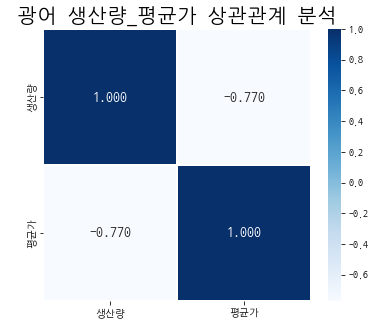

In [8]:
plt.figure( figsize= (6,5) )
plt.title(' 광어 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = ff_corr.corr(method='pearson'), annot=True, fmt='.3f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

# 방어 생산량_평균가 상관관계

In [9]:
# `수산물_위판정보_전처리완료`에서 방어만 뽑아옴 
yt_price = price[price['수산물표준코드명'] == '방어']
yt_price.reset_index(drop=True, inplace=True)

for row in range(len(yt_price)):
  yt_price.loc[row, '위판일자'] = yt_price.loc[row, '위판일자'].replace('-0','-').replace("-",".")

# 19년도부터 21년도까지 총 36개월 생산량 자료 구해서 list로   
yt_price_list = []
for y in range(3):
  for m in range(1,13):
    month_price = []
    for d in range(1,32):
      if yt_price[yt_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean() >= 0 : 
        month_price.append(yt_price[yt_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean())
    yt_price_list.append( round( sum(month_price) / len(month_price), 2 ) )

In [10]:
# 해면어업 품종별 생산량에서 방어만 뽑음
yt_production = production[production['품종별'] == '방어류'].reset_index(drop=True)

# 계산하기 편하게하기 위해 컬럼명 바꿔줌
for col in range(1,len(yt_production.columns) ) :
  old_col = yt_production.columns[col]
  new_col = yt_production.columns[col].replace(".0",".").replace("월","").replace(" ","")
  yt_production.rename(columns={ old_col : new_col },inplace=True)

In [11]:
# 방어
yt_corr = {'일자': list(yt_production.columns[1:].values), '생산량': list(yt_production.iloc[0,1:].values), '평균가': yt_price_list} 
yt_corr = pd.DataFrame(yt_corr)
# yt_corr

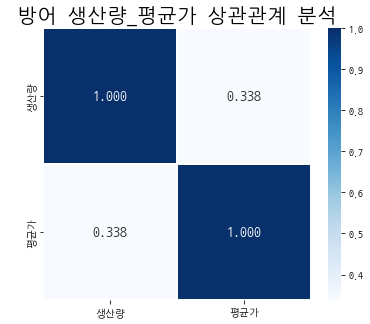

In [12]:
plt.figure( figsize= (6,5) )
plt.title(' 방어 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = yt_corr.corr(method='pearson'), annot=True, fmt='.3f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})

# 감성돔 생산량_평균가 상관관계

In [13]:
# `수산물_위판정보_전처리완료`에서 감성돔만 뽑아옴 
bp_price = price[price['수산물표준코드명'] == '감성돔']
bp_price.reset_index(drop=True, inplace=True)

for row in range(len(bp_price)):
  bp_price.loc[row, '위판일자'] = bp_price.loc[row, '위판일자'].replace('-0','-').replace("-",".")

# 19년도부터 21년도까지 총 36개월 생산량 자료 구해서 list로   
bp_price_list = []
for y in range(3):
  for m in range(1,13):
    month_price = []
    for d in range(1,32):
      if bp_price[bp_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean() >= 0 : 
        month_price.append(bp_price[bp_price['위판일자'] == f'{2019+y}.{m}.{d}']['평균가'].values.mean())
    bp_price_list.append( round( sum(month_price) / len(month_price), 2 ) )

In [14]:
# 해면어업 품종별 생산량에서 감성돔만 뽑음
bp_production = production[production['품종별'] == '감성돔'].reset_index(drop=True)

# 계산하기 편하게하기 위해 컬럼명 바꿔줌
for col in range(1,len(bp_production.columns) ) :
  old_col = bp_production.columns[col]
  new_col = bp_production.columns[col].replace(".0",".").replace("월","").replace(" ","")
  bp_production.rename(columns={ old_col : new_col },inplace=True)

In [15]:
# 감성돔
bp_corr = {'일자': list(bp_production.columns[1:].values), '생산량': list(bp_production.iloc[0,1:].values), '평균가': bp_price_list} 
bp_corr = pd.DataFrame(bp_corr)
# bp_corr

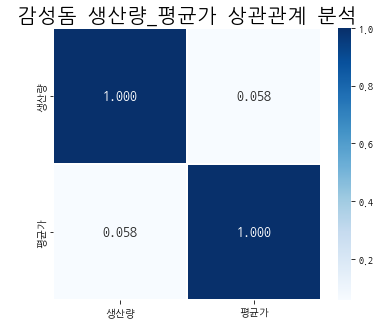

In [16]:
plt.figure( figsize= (6,5) )
plt.title(' 감성돔 생산량_평균가 상관관계 분석 ', fontsize = 20)
sns.heatmap( data = bp_corr.corr(method='pearson'), annot=True, fmt='.3f', linewidths=.5, cmap='Blues',annot_kws = {'size' : 14})